**IMPORT NECESSARY LIBRARIES**

In [1]:
# Import necessary libraries for data manipulation, visualization, preprocessing, dimensionality reduction
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns  
import plotly.express as px  

# Import libraries for machine learning tasks
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  
from sklearn.decomposition import PCA  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report 
from sklearn.feature_selection import SelectKBest, chi2, RFE 

import gdown

import warnings
warnings.filterwarnings('ignore') 

***Download the Data through drive***

In [2]:
# Google Drive file ID (Extract from the URL)
file_id = "1Lt5LLbM1Z4c6wcv9FOadmNp-e_CvdEZ7"

# Direct download URL
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
csv_path = "healthcare.csv"  # Save it locally
gdown.download(download_url, csv_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Lt5LLbM1Z4c6wcv9FOadmNp-e_CvdEZ7
To: C:\Users\RAMAN\Desktop\New folder\healthcare analysis\healthcare.csv
100%|██████████| 1.61M/1.61M [00:00<00:00, 3.47MB/s]


'healthcare.csv'

**LOADING THE DATASET**

In [3]:
healthcare = pd.read_csv(csv_path)

healthcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days Hospitalized
0,Tiffany Ramirez,81.0,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,44215.366126,146.0,Elective,2022-12-01,Aspirin,Inconclusive,14
1,Ruben Burns,39.5,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,65188.785686,404.0,Emergency,2023-06-15,Lipitor,Normal,20
2,Chad Byrd,65.5,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,50816.558062,292.0,Emergency,2019-02-08,Lipitor,Normal,36
3,Antonio Frederick,44.5,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322090,480.0,Urgent,2020-05-03,Penicillin,Abnormal,-5
4,Mrs. Brandy Flowers,55.5,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,24924.429181,477.0,Urgent,2021-08-02,Paracetamol,Normal,30


In [4]:
healthcare.head().T

,0,1,2,3,4
Name,Tiffany Ramirez,Ruben Burns,Chad Byrd,Antonio Frederick,Mrs. Brandy Flowers
Age,81.0,39.5,65.5,44.5,55.5
Gender,Female,Male,Male,Male,Male
Blood Type,O-,O+,B-,B-,O-
Medical Condition,Diabetes,Asthma,Obesity,Asthma,Arthritis
Date of Admission,2022-11-17,2023-06-01,2019-01-09,2020-05-02,2021-07-09
Doctor,Patrick Parker,Diane Jackson,Paul Baker,Brian Chandler,Dustin Griffin
Hospital,Wallace-Hamilton,"Burke, Griffin and Cooper",Walton LLC,Garcia Ltd,"Jones, Brown and Murray"
Insurance Provider,Medicare,UnitedHealthcare,Medicare,Medicare,UnitedHealthcare
Billing Amount,44215.366126,65188.785686,50816.558062,23303.32209,24924.429181


 Display the first few rows of the dataset (transposed for better readability)

**DATASET BRIEF OVERVIEW**

In [5]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10500 non-null  object 
 1   Age                 10500 non-null  float64
 2   Gender              10500 non-null  object 
 3   Blood Type          10496 non-null  object 
 4   Medical Condition   10499 non-null  object 
 5   Date of Admission   10500 non-null  object 
 6   Doctor              10500 non-null  object 
 7   Hospital            10500 non-null  object 
 8   Insurance Provider  10499 non-null  object 
 9   Billing Amount      10499 non-null  float64
 10  Room Number         10500 non-null  float64
 11  Admission Type      10500 non-null  object 
 12  Discharge Date      10500 non-null  object 
 13  Medication          10496 non-null  object 
 14  Test Results        10500 non-null  object 
 15  Days Hospitalized   10500 non-null  int64  
dtypes: f

In [7]:
# It gives the summary statistics for numerical features
healthcare.describe()

,Age,Billing Amount,Room Number,Days Hospitalized
count,10500.000000,1.049900e+04,10500.000000,10500.000000
mean,51.508547,3.034200e+04,300.793409,15.469333
std,20.404464,2.037340e+04,118.429979,9.867863
min,13.500000,1.000181e+03,101.000000,-5.000000
25%,34.500000,1.589653e+04,199.000000,8.000000
50%,51.500000,2.941043e+04,299.000000,16.000000
75%,68.500000,4.379617e+04,401.000000,23.000000
max,251.848191,1.080000e+06,1457.759551,36.000000


We can understand from the above table that age range of patients is between 18 to 251.848191 this signifis something is incorrect. 

In [9]:
# It gives the summary statistics for categorical features
healthcare.describe(include = 'O')

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,10500,10500,10496,10499,10500,10500,10500,10499,10500,10500,10496,10500
unique,9378,2,8,6,1815,9416,8639,5,3,1834,5,3
top,James Johnson,Female,AB-,Asthma,2022-06-04,Michael Johnson,Smith PLC,Blue Cross,Emergency,2019-01-07,Penicillin,Abnormal
freq,7,5340,1334,1799,17,10,19,2152,3558,16,2177,3628


In [10]:
healthcare.shape

(10500, 16)

There are 10500 rows and 16 columns in this dataset.

**DATA CLEANING**

In [11]:
#Check for missing values in each column
healthcare.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            4
Medical Condition     1
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    1
Billing Amount        1
Room Number           0
Admission Type        0
Discharge Date        0
Medication            4
Test Results          0
Days Hospitalized     0
dtype: int64

In [12]:
# Filling categorical columns with mode
for col in healthcare.select_dtypes(include=['object']).columns:
    healthcare[col].fillna(healthcare[col].mode()[0], inplace=True)



In [13]:
# Filling numerical columns with median
for col in healthcare.select_dtypes(include=['number']).columns:
    healthcare[col].fillna(healthcare[col].median(), inplace=True)

In [14]:
healthcare.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Days Hospitalized     0
dtype: int64

There are no null values in our healthcare dataset as the value for all the columns are zero.

In [15]:
#Check for duplicate rows in the dataset
healthcare.duplicated().sum()

495

In [17]:
healthcare.drop_duplicates(inplace=True)

In [18]:
healthcare.duplicated().sum()

0

In [19]:
healthcare.describe()

,Age,Billing Amount,Room Number,Days Hospitalized
count,10005.000000,1.000500e+04,10005.000000,10005.000000
mean,51.467141,3.034907e+04,300.693633,15.445477
std,20.436078,2.051714e+04,118.603322,9.879348
min,13.500000,1.000181e+03,101.000000,-5.000000
25%,34.500000,1.590020e+04,199.000000,8.000000
50%,51.500000,2.941043e+04,299.000000,16.000000
75%,68.500000,4.383920e+04,401.000000,23.000000
max,251.848191,1.080000e+06,1457.759551,36.000000


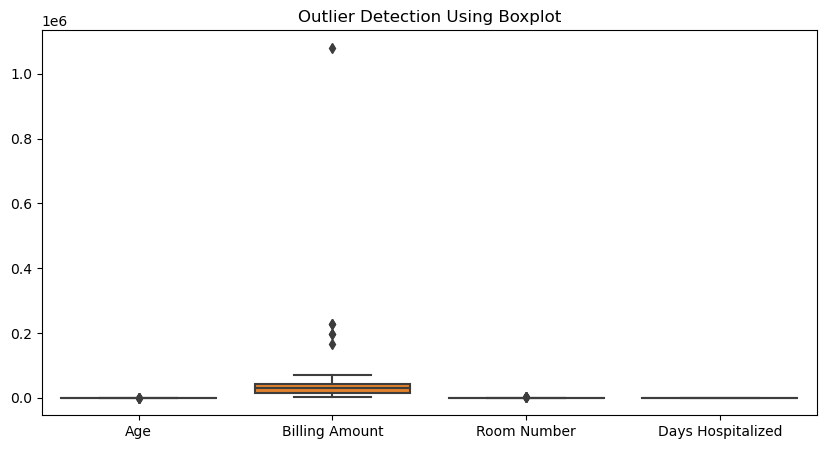

In [20]:
# Plot boxplots for all numerical columns
plt.figure(figsize=(10, 5))
sns.boxplot(data=healthcare.select_dtypes(include=['number']))
plt.title("Outlier Detection Using Boxplot")
plt.show()

In [21]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df):
    for col in df.select_dtypes(include=['number']):  # Only numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [22]:
# Remove outliers
healthcare_cleaned = remove_outliers_iqr(healthcare)

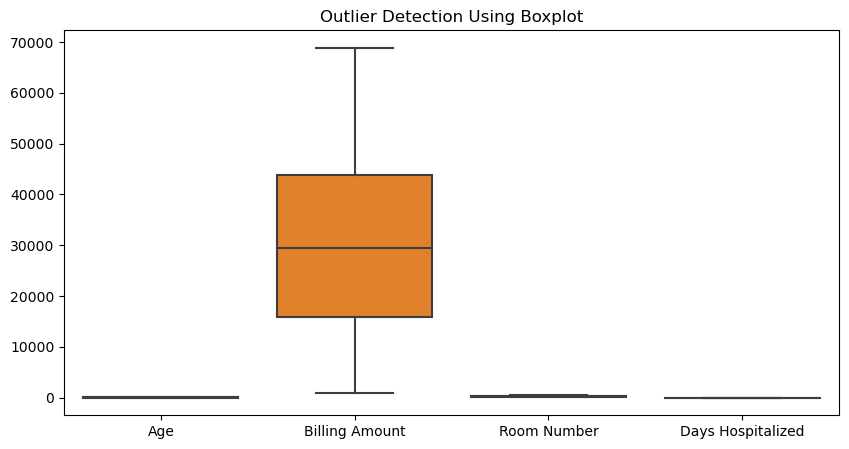

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=healthcare_cleaned.select_dtypes(include=['number']))
plt.title("Outlier Detection Using Boxplot")
plt.show()

In [24]:
healthcare_cleaned.describe()

,Age,Billing Amount,Room Number,Days Hospitalized
count,9989.000000,9989.000000,9989.000000,9989.000000
mean,51.361698,30147.121154,300.116728,15.441786
std,19.961689,17191.631937,115.777476,9.877207
min,13.500000,1000.180837,101.000000,-5.000000
25%,34.500000,15892.996070,199.000000,8.000000
50%,51.500000,29405.133880,299.000000,16.000000
75%,68.500000,43769.670527,400.000000,23.000000
max,89.500000,68869.281467,500.000000,36.000000


In [25]:
healthcare_cleaned.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days Hospitalized
0,Tiffany Ramirez,81.0,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,44215.366126,146.0,Elective,2022-12-01,Aspirin,Inconclusive,14
1,Ruben Burns,39.5,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,65188.785686,404.0,Emergency,2023-06-15,Lipitor,Normal,20
2,Chad Byrd,65.5,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,50816.558062,292.0,Emergency,2019-02-08,Lipitor,Normal,36
3,Antonio Frederick,44.5,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322090,480.0,Urgent,2020-05-03,Penicillin,Abnormal,-5
4,Mrs. Brandy Flowers,55.5,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,24924.429181,477.0,Urgent,2021-08-02,Paracetamol,Normal,30


In [26]:
#drop columns irrelevant to our analysis
healthcare = healthcare_cleaned.drop(columns = ['Name','Date of Admission','Discharge Date','Room Number'])
healthcare.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Medication', 'Test Results', 'Days Hospitalized'],
      dtype='object')

**DATA EXPLORATION AND VISUALIZATION**

In [27]:
#using for loop to find the distribution of data for categorical columns
for col in healthcare.columns:
    if healthcare[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print(healthcare[col].value_counts())
        print('--')

Female    5072
Male      4917
Name: Gender, dtype: int64
--
AB-    1278
AB+    1255
B-     1250
O+     1247
B+     1242
O-     1241
A+     1240
A-     1236
Name: Blood Type, dtype: int64
--
Asthma          1706
Cancer          1702
Hypertension    1687
Arthritis       1647
Obesity         1628
Diabetes        1619
Name: Medical Condition, dtype: int64
--
Cigna               2037
Blue Cross          2031
Aetna               2021
UnitedHealthcare    1976
Medicare            1924
Name: Insurance Provider, dtype: int64
--
Urgent       3382
Emergency    3367
Elective     3240
Name: Admission Type, dtype: int64
--
Penicillin     2081
Lipitor        2009
Ibuprofen      1975
Aspirin        1963
Paracetamol    1961
Name: Medication, dtype: int64
--
Abnormal        3456
Inconclusive    3271
Normal          3262
Name: Test Results, dtype: int64
--


____________________________________________________________________________________________________


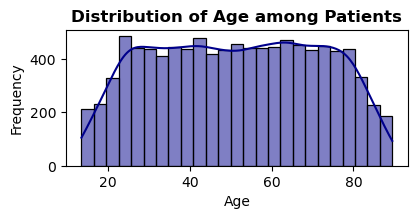

____________________________________________________________________________________________________


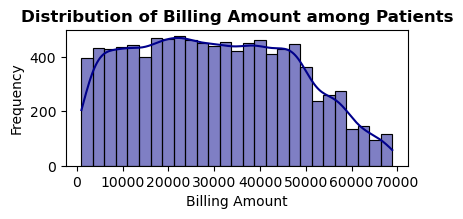

In [28]:
#plotting histograms to find the frequency of numeric columns (age, billing amount and days hospitalized)
for col in healthcare.columns:
    if healthcare[col].dtype == 'int' or healthcare[col].dtype == 'float':
        plt.figure(figsize = (15,6))
        plt.style.use('seaborn-v0_8-dark-palette')
        plt.subplot(3,3,3)
        sns.histplot(healthcare[col],kde = True,color = 'darkblue')
        plt.ylabel('Frequency',fontsize = 10)
        plt.xlabel(col,fontsize = 10)
        plt.title(f'Distribution of {col} among Patients',fontsize = 12,weight = 'bold')
        print("_"*100)
        plt.show()

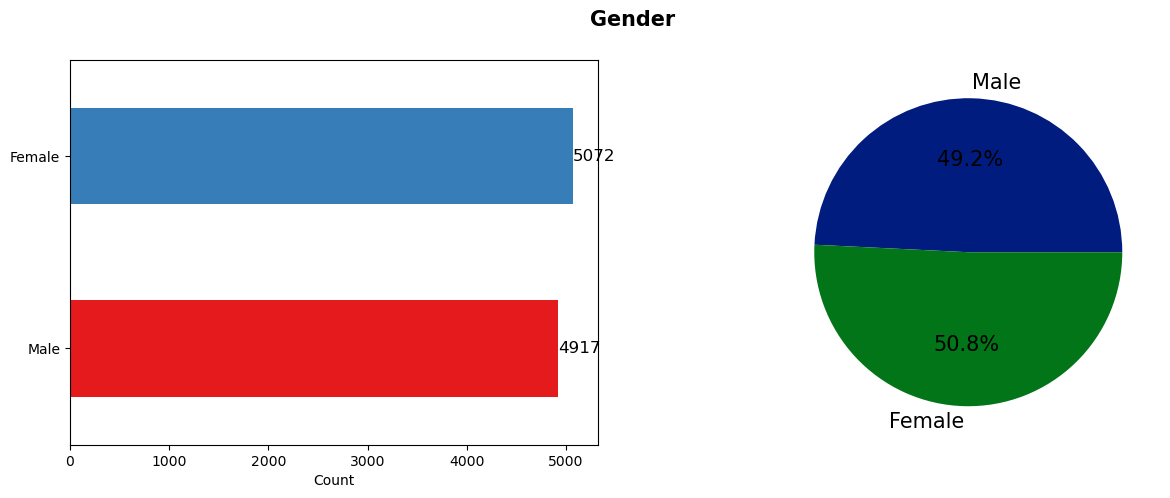

____________________________________________________________________________________________________




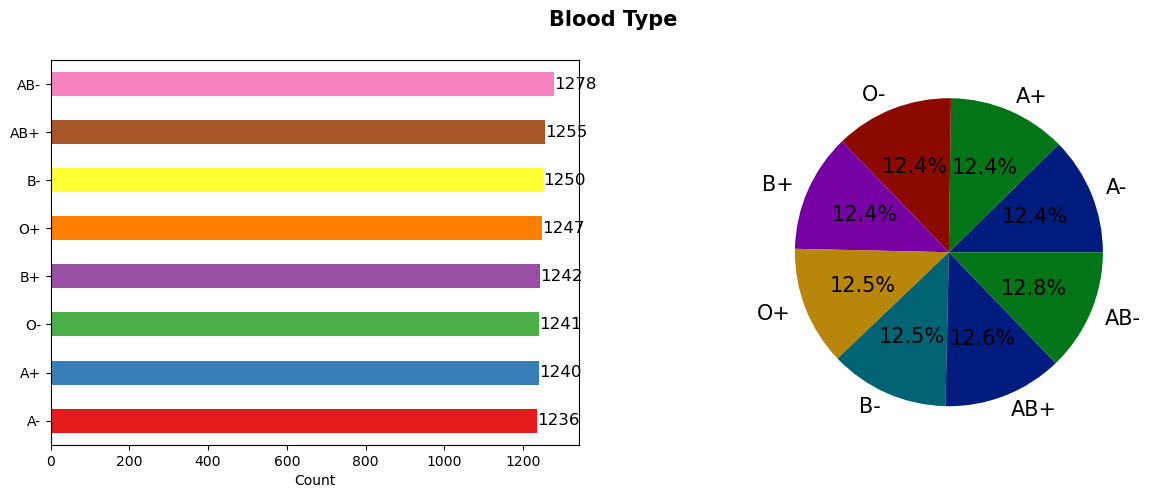

____________________________________________________________________________________________________




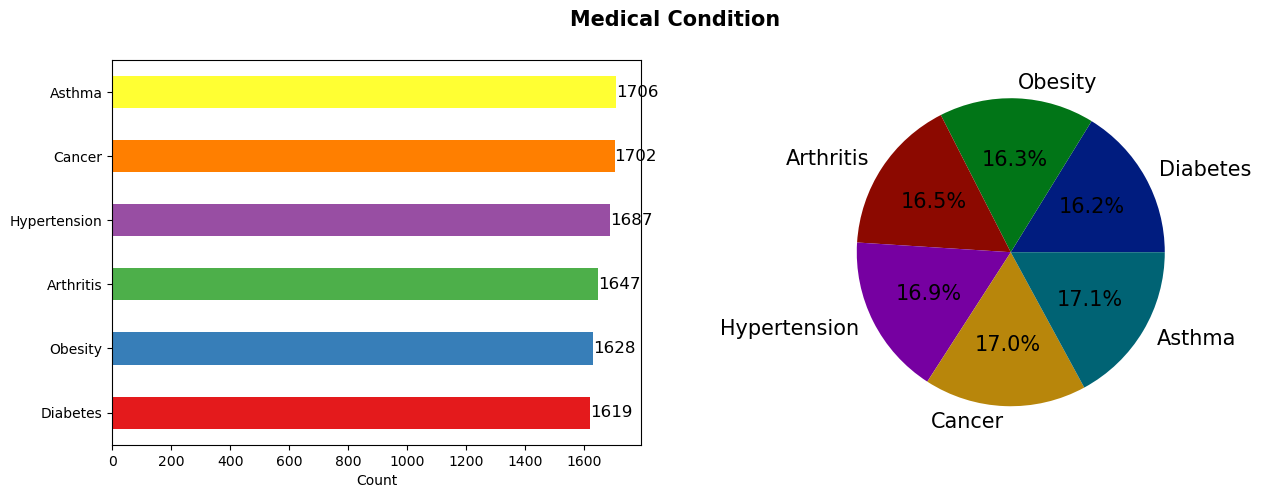

____________________________________________________________________________________________________




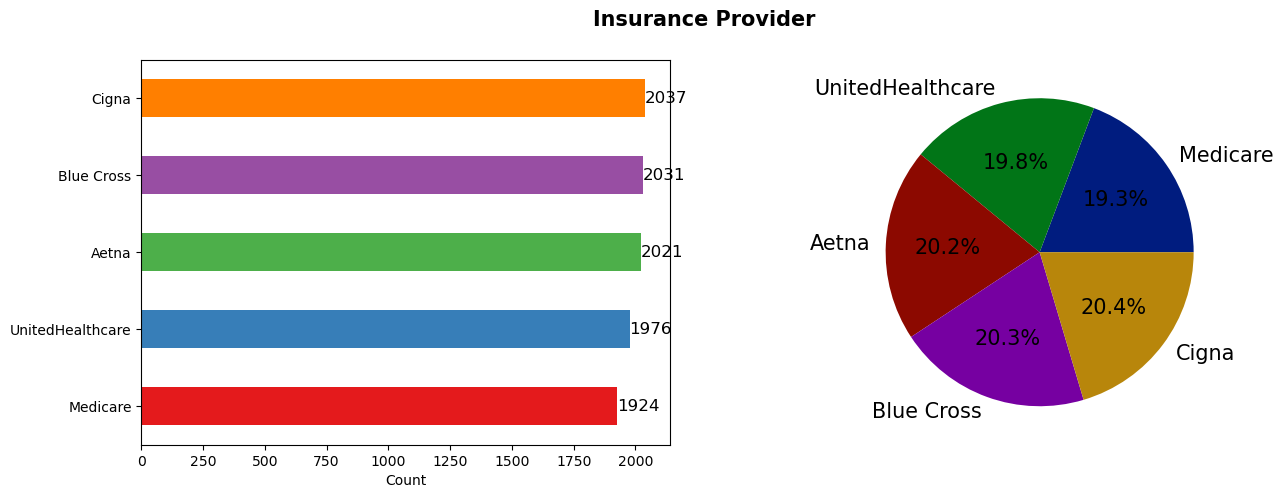

____________________________________________________________________________________________________




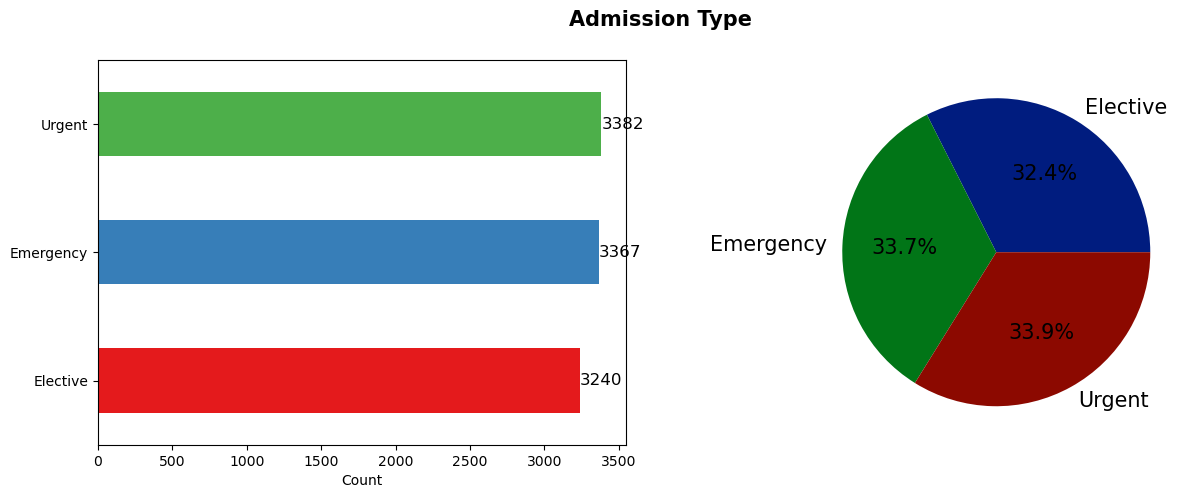

____________________________________________________________________________________________________




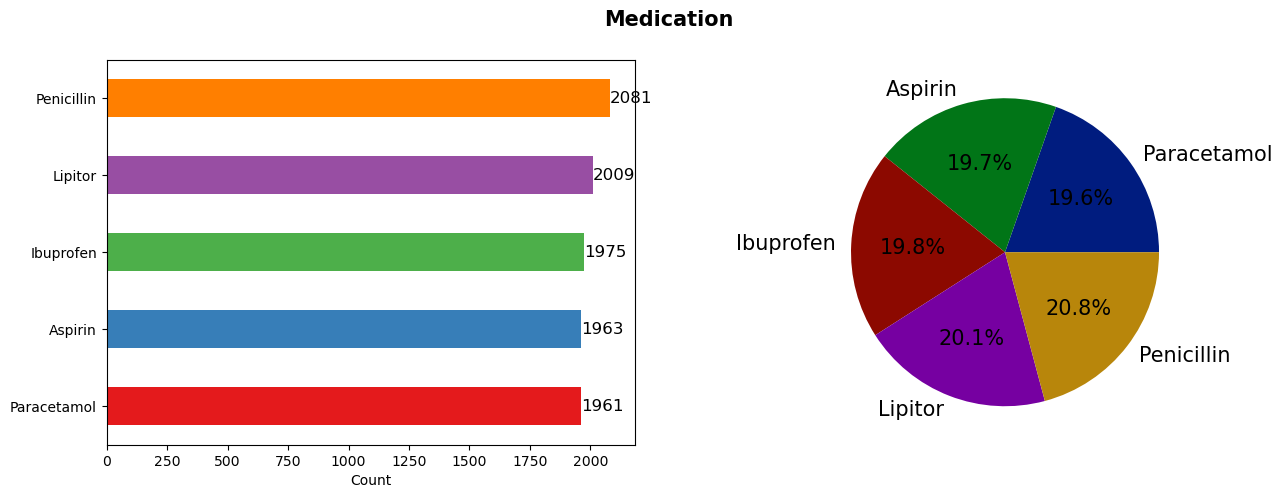

____________________________________________________________________________________________________




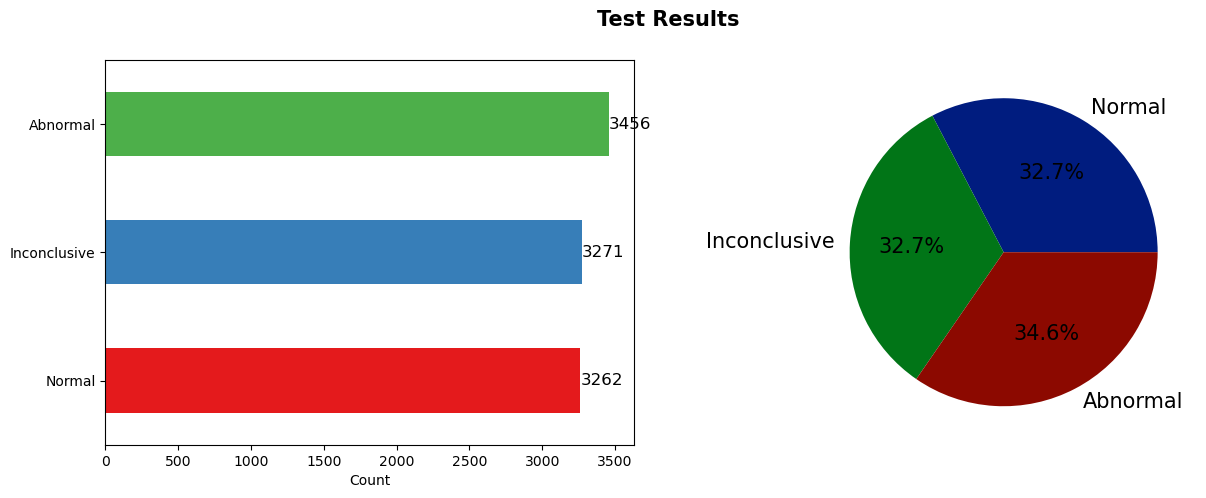

____________________________________________________________________________________________________


In [29]:
#plotting pie chart and bar chart to find the data distribution for categorical columns
#using for loop for visualization of data in categorical columns
for col in healthcare.columns:
    if healthcare[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print('\n')
        fig,ax = plt.subplots(1,2,figsize = (15,5))
        fig.suptitle(col,fontsize = 15,weight = 'bold')
        plt.subplot(1,2,1)
        category_count = healthcare[col].value_counts().sort_values()
        category_count.plot(kind = 'barh',color= plt.cm.Set1.colors)
        for index,value in enumerate(category_count):
            plt.text(value,index,str(value),fontsize = 12,va = 'center')
        plt.xlabel('Count')
        plt.subplot(1,2,2)
        category_count.plot(kind = 'pie',
               labels = category_count.index,
               autopct = '%1.1f%%',
               textprops = {'fontsize':15})
        plt.ylabel('')
        plt.show()
        print("_"*100)

**What is the distribution of medical condtions between genders?**

In [30]:
#unstack function converts the data into 2 dimensional
gender_medical = healthcare.groupby(['Medical Condition','Gender']).size().sort_values().unstack()
gender_medical

Gender,Female,Male
Medical Condition,,
Arthritis,815,832
Asthma,873,833
Cancer,887,815
Diabetes,823,796
Hypertension,836,851
Obesity,838,790


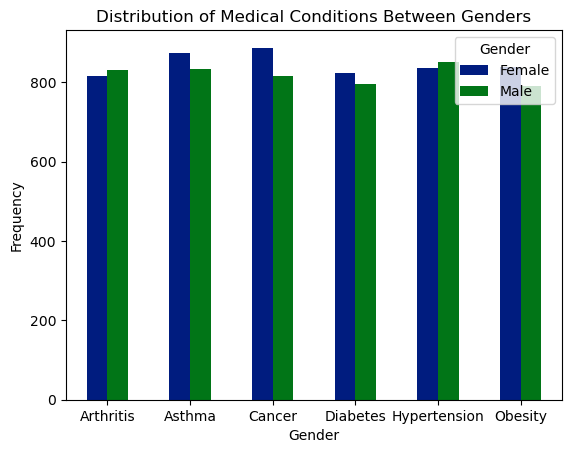

In [31]:
gender_medical.plot(kind = 'bar')
plt.title('Distribution of Medical Conditions Between Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

***Interpretation***

Female have higher share in majority of the medical conditions. Cancer is leading medical condition among female whereas Hypertension is leading cause among male.

**What is the total billing amount for top 10 hospitals?**

In [32]:
# Grouping data by hospital and calculating the average billing amount
top10_hospital_billing = healthcare.groupby(['Hospital'])['Billing Amount'].sum().sort_values(ascending = False)[:10].reset_index()
top10_hospital_billing

,Hospital,Billing Amount
0,Smith and Sons,560599.680399
1,Smith Ltd,515930.354244
2,Smith PLC,497360.269186
3,Smith Inc,425988.252847
4,Thomas Group,409345.357583
5,Williams LLC,393117.638429
6,Johnson Ltd,370997.457184
7,Brown LLC,332596.475716
8,Davis and Sons,332127.168702
9,Jones Inc,321746.410449


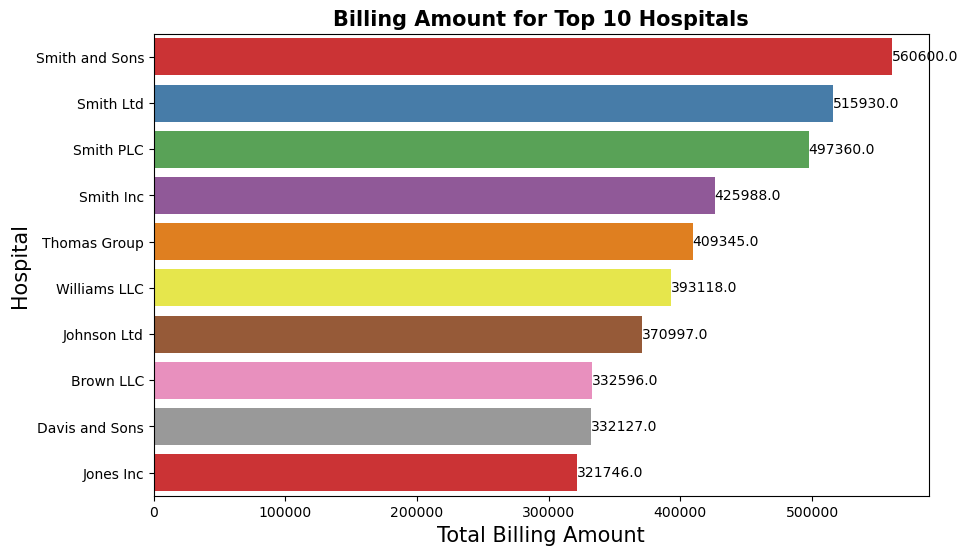

In [33]:
# plot bar graph to find the top 10 hospitals by billing
plt.figure(figsize=(10,6))
sns.barplot(x= top10_hospital_billing['Billing Amount'],
            y= top10_hospital_billing['Hospital'],
            palette="Set1")
for index,value in enumerate(top10_hospital_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Hospital',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 10 Hospitals',fontsize = 15, weight = 'bold')
plt.show()

***INTERPRETATION***

Smith and Sons has the highest average billing amount of 560600.

**Who are the top 20 doctors by billing amount?**

In [34]:
# Grouping data by doctors and calculating the sum of billing amount
top20_doctors_billing = healthcare.groupby(['Doctor'])['Billing Amount'].sum().sort_values(ascending = False)[:20].reset_index()
top20_doctors_billing

,Doctor,Billing Amount
0,Robert Brown,192043.326841
1,Michael Johnson,191125.355507
2,Jennifer Smith,188652.432994
3,Christopher Davis,174302.129760
4,Angela Jones,168618.181063
5,Robert Miller,157763.231088
6,Matthew Williams,156591.254261
7,Jessica Johnson,153643.388813
8,Daniel Smith,148468.626832
9,John Jones,142253.466647


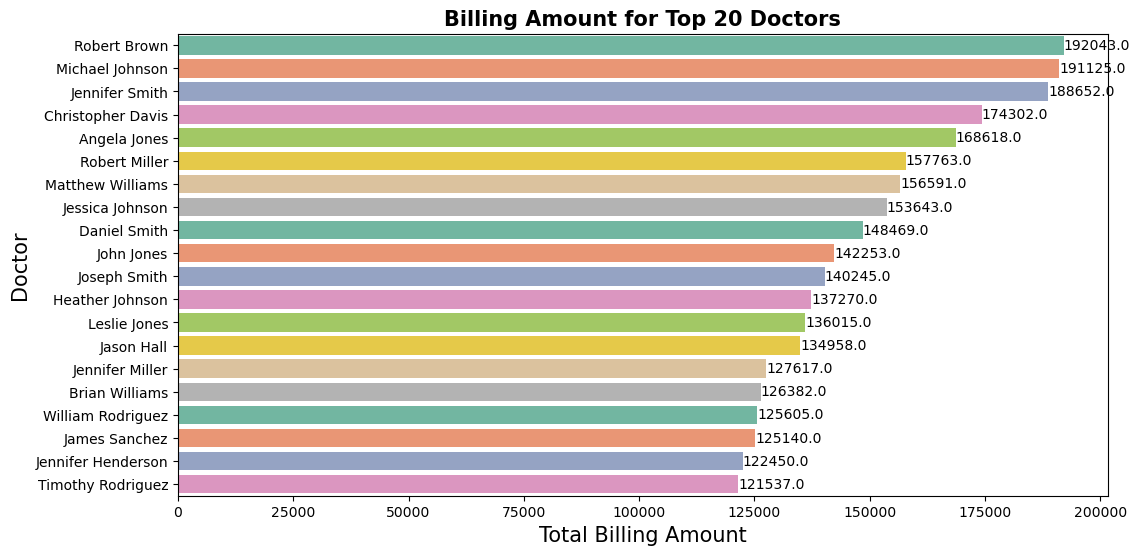

In [35]:
# plot bar graph to find the top 20 doctors by billing
plt.figure(figsize=(12,6))
sns.barplot(x= top20_doctors_billing['Billing Amount'],
            y= top20_doctors_billing['Doctor'],
            palette="Set2")
for index,value in enumerate(top20_doctors_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Doctor',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 20 Doctors',fontsize = 15, weight = 'bold')
plt.show()

***Interpretation***


Doctor Robert Brown is the top doctor with a total billing amount of 192043.32.

**Which medical condition generated the highest average billing among male and female?**

In [37]:
# Grouping data by medical condition and gender then calculating the mean of billing amount
medical_gender_billing = healthcare.groupby(['Medical Condition','Gender'])[['Billing Amount']].mean().reset_index()
medical_gender_billing

,Medical Condition,Gender,Billing Amount
0,Arthritis,Female,29306.628741
1,Arthritis,Male,30335.955966
2,Asthma,Female,30029.929057
3,Asthma,Male,29508.763975
4,Cancer,Female,30104.082528
5,Cancer,Male,30524.152054
6,Diabetes,Female,31313.029090
7,Diabetes,Male,30557.621469
8,Hypertension,Female,29678.717519
9,Hypertension,Male,29726.986230


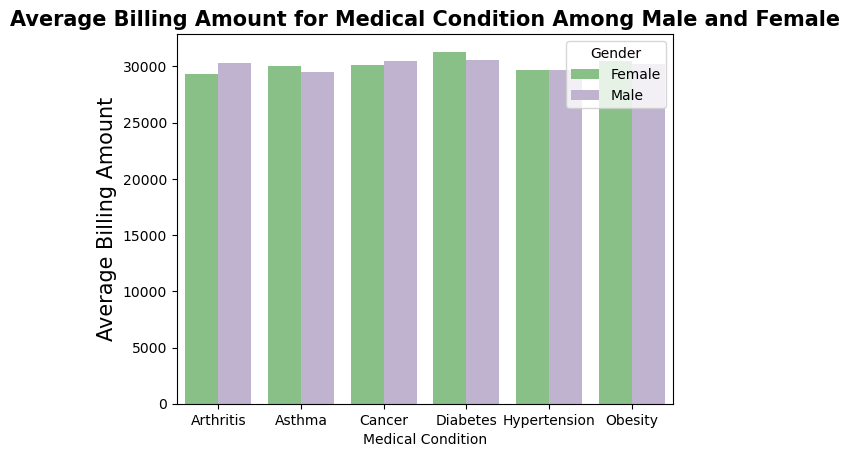

In [38]:
# plot bar graph to find the average billing amount for medical condition among male and female
sns.barplot(x= medical_gender_billing['Medical Condition'],
            y= medical_gender_billing['Billing Amount'],
            hue = medical_gender_billing['Gender'],ci = None,
            palette="Accent")
# Adding labels and title
plt.ylabel('Average Billing Amount',fontsize = 15)
plt.title('Average Billing Amount for Medical Condition Among Male and Female',fontsize = 15, weight = 'bold')
plt.show()

**What is the distribution of different age groups?**

In [39]:
min_age = healthcare['Age'].min()
max_age = healthcare['Age'].max()
print(min_age,",",max_age)

13.5 , 89.5


In [40]:
healthcare['Age_Group'] = pd.cut(healthcare['Age'],bins = [18,30,40,50,60,70,80,float('inf')],
                                labels = ['18-30','31-40','41-50','51-60','61-70','71-80','Over 80'],
                                right = False)
Age_group = healthcare['Age_Group'].value_counts().sort_values(ascending = False)
Age_group

18-30      1573
61-70      1504
71-80      1489
31-40      1481
41-50      1450
51-60      1437
Over 80     793
Name: Age_Group, dtype: int64

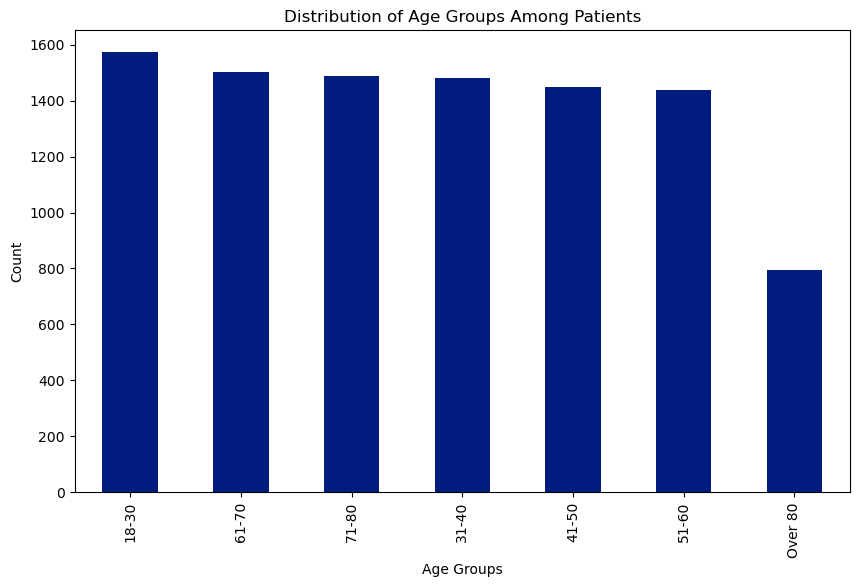

In [41]:
plt.figure(figsize=(10,6))
Age_group.plot(kind = 'bar')
plt.title('Distribution of Age Groups Among Patients')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

***Interpretation***

The maximum number of patients are in the range of 18-30.

**CONCLUSION**

- Compared to male, there are high female patients.
- Most patients have the blood type of **AB-**.
- Asthma is the major medical condition among patients.
- Cigna is the leading insurance provider.
- Pencilin is the most prescribed medication.

**DATA Transformation**

In [42]:
# Identify categorical columns
categorical_cols = healthcare.select_dtypes(include=['object']).columns

In [43]:
# Initialize an empty dictionary to store label mappings
label_mappings = {}

# Apply Label Encoding correctly
for col in categorical_cols:
    le = LabelEncoder()
    healthcare[col] = le.fit_transform(healthcare[col])  # Fit and transform the column
    
    # Store the mapping of original category -> encoded value
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Print label mappings
for col, mapping in label_mappings.items():
    print(f"Label Encoding for {col}:")
    for category, label in mapping.items():
        print(f"  '{category}' -> {label}")
    print("-" * 30)

Label Encoding for Gender:
  'Female' -> 0
  'Male' -> 1
------------------------------
Label Encoding for Blood Type:
  'A+' -> 0
  'A-' -> 1
  'AB+' -> 2
  'AB-' -> 3
  'B+' -> 4
  'B-' -> 5
  'O+' -> 6
  'O-' -> 7
------------------------------
Label Encoding for Medical Condition:
  'Arthritis' -> 0
  'Asthma' -> 1
  'Cancer' -> 2
  'Diabetes' -> 3
  'Hypertension' -> 4
  'Obesity' -> 5
------------------------------
Label Encoding for Doctor:
  'Aaron Anderson' -> 0
  'Aaron Barrera' -> 1
  'Aaron Boone' -> 2
  'Aaron Brewer' -> 3
  'Aaron Brown' -> 4
  'Aaron Bruce' -> 5
  'Aaron Burnett' -> 6
  'Aaron Cameron MD' -> 7
  'Aaron Christensen' -> 8
  'Aaron Gonzalez' -> 9
  'Aaron Graves' -> 10
  'Aaron Hall' -> 11
  'Aaron Hill' -> 12
  'Aaron Houston' -> 13
  'Aaron Johnson' -> 14
  'Aaron Jones' -> 15
  'Aaron Joseph' -> 16
  'Aaron Martinez' -> 17
  'Aaron Mills' -> 18
  'Aaron Nelson' -> 19
  'Aaron Padilla' -> 20
  'Aaron Powell' -> 21
  'Aaron Riggs' -> 22
  'Aaron Smith' -> 

In [44]:
# Splitting Data
X = healthcare.drop(columns=['Test Results','Age_Group'])  # Target column
y = healthcare['Test Results']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=5002)


In [45]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Feature Selection using PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


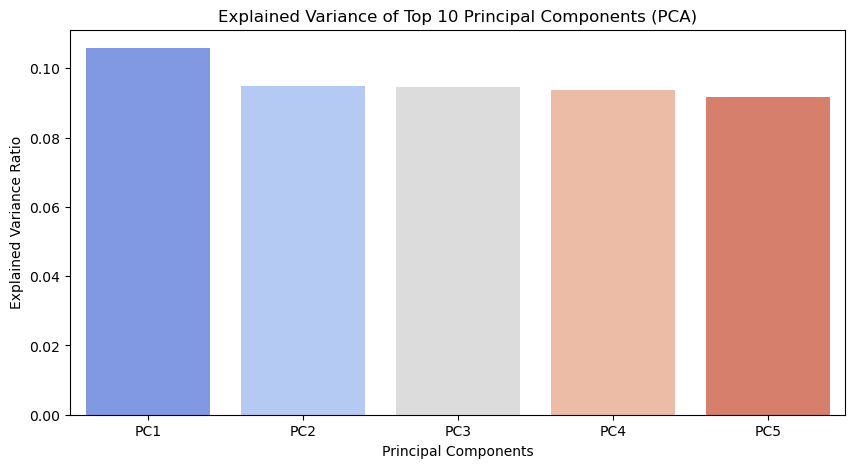

In [47]:
# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(10, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(5)], y=explained_variance, palette="coolwarm")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance of Top 10 Principal Components (PCA)")
plt.show()

In [48]:
# Feature Selection Techniques

# Wrapper Method: Recursive Feature Elimination (RFE)
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=2)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)


In [49]:
selected_features = X.columns[rfe.support_].tolist()
print("Selected Features:", selected_features)


Selected Features: ['Age', 'Days Hospitalized']


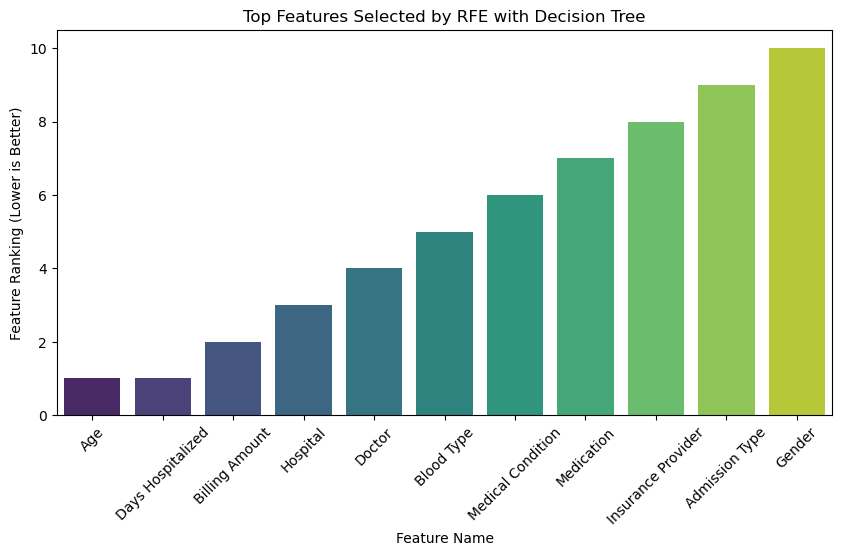

In [50]:
# Get feature rankings
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)

# Plot the feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_ranking.sort_values().index, y=feature_ranking.sort_values().values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Feature Name")
plt.ylabel("Feature Ranking (Lower is Better)")
plt.title("Top Features Selected by RFE with Decision Tree")
plt.show()

In [51]:
# Decision Tree Classification (Without Feature Scaling & Selection)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [52]:
# Metrics
print("Without Scaling & Selection:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Without Scaling & Selection:
Accuracy: 0.7137137137137137
              precision    recall  f1-score   support

           0       0.72      0.69      0.70       691
           1       0.75      0.77      0.76       654
           2       0.67      0.68      0.67       653

    accuracy                           0.71      1998
   macro avg       0.71      0.71      0.71      1998
weighted avg       0.71      0.71      0.71      1998



In [53]:
# 6. Decision Tree with Feature Scaling
dt_scaled = DecisionTreeClassifier(random_state=42)
dt_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [54]:
print("\nWith Scaling:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_scaled)}")
print(classification_report(y_test, y_pred_scaled))


With Scaling:
Accuracy: 0.7162162162162162
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       691
           1       0.76      0.77      0.76       654
           2       0.67      0.69      0.68       653

    accuracy                           0.72      1998
   macro avg       0.72      0.72      0.72      1998
weighted avg       0.72      0.72      0.72      1998



In [55]:
# 7. with Feature Selection
dt_pca = DecisionTreeClassifier(random_state=42)
dt_pca.fit(X_train_pca, y_train)
y_pred_pca = dt_pca.predict(X_test_pca)

In [56]:
print("\nWith Feature Selection (PCA):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_pca)}")
print(classification_report(y_test, y_pred_pca))


With Feature Selection (PCA):
Accuracy: 0.4344344344344344
              precision    recall  f1-score   support

           0       0.48      0.48      0.48       691
           1       0.34      0.33      0.34       654
           2       0.47      0.49      0.48       653

    accuracy                           0.43      1998
   macro avg       0.43      0.43      0.43      1998
weighted avg       0.43      0.43      0.43      1998



In [57]:
# with Feature Selection
dt_filter = DecisionTreeClassifier(random_state=42)
dt_filter.fit(X_train_rfe, y_train)
y_pred_filter = dt_filter.predict(X_test_rfe)

In [58]:
print("\nWith Feature Selection (filter):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_filter)}")
print(classification_report(y_test, y_pred_filter))


With Feature Selection (filter):
Accuracy: 0.8173173173173173
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       691
           1       0.98      0.98      0.98       654
           2       0.77      0.67      0.71       653

    accuracy                           0.82      1998
   macro avg       0.82      0.82      0.82      1998
weighted avg       0.82      0.82      0.82      1998



**CONCLUSION**

- With static feature selection gives more enhance result with proper selection of the correct ferure.
- Some time there is no key role of the data normaliztion.